# Industry Accelerators - Customer Attrition Prediction

### Introduction

The Customer Attrition Prediction accelerator includes a structured glossary of more than 190 business terms and a set of sample data science assets. The glossary provides the information architecture that you need to understand why customers leave. Your data scientists can use the sample notebooks, predictive models, and dashboards to accelerate data preparation, machine learning modeling, and data reporting. Understand the likelihood of a Customer Attrition occurring or their Funds Under Management dropping by a specific threshold or higher in a month & analyse the business metrics influencing the Attrition based on temporal data.

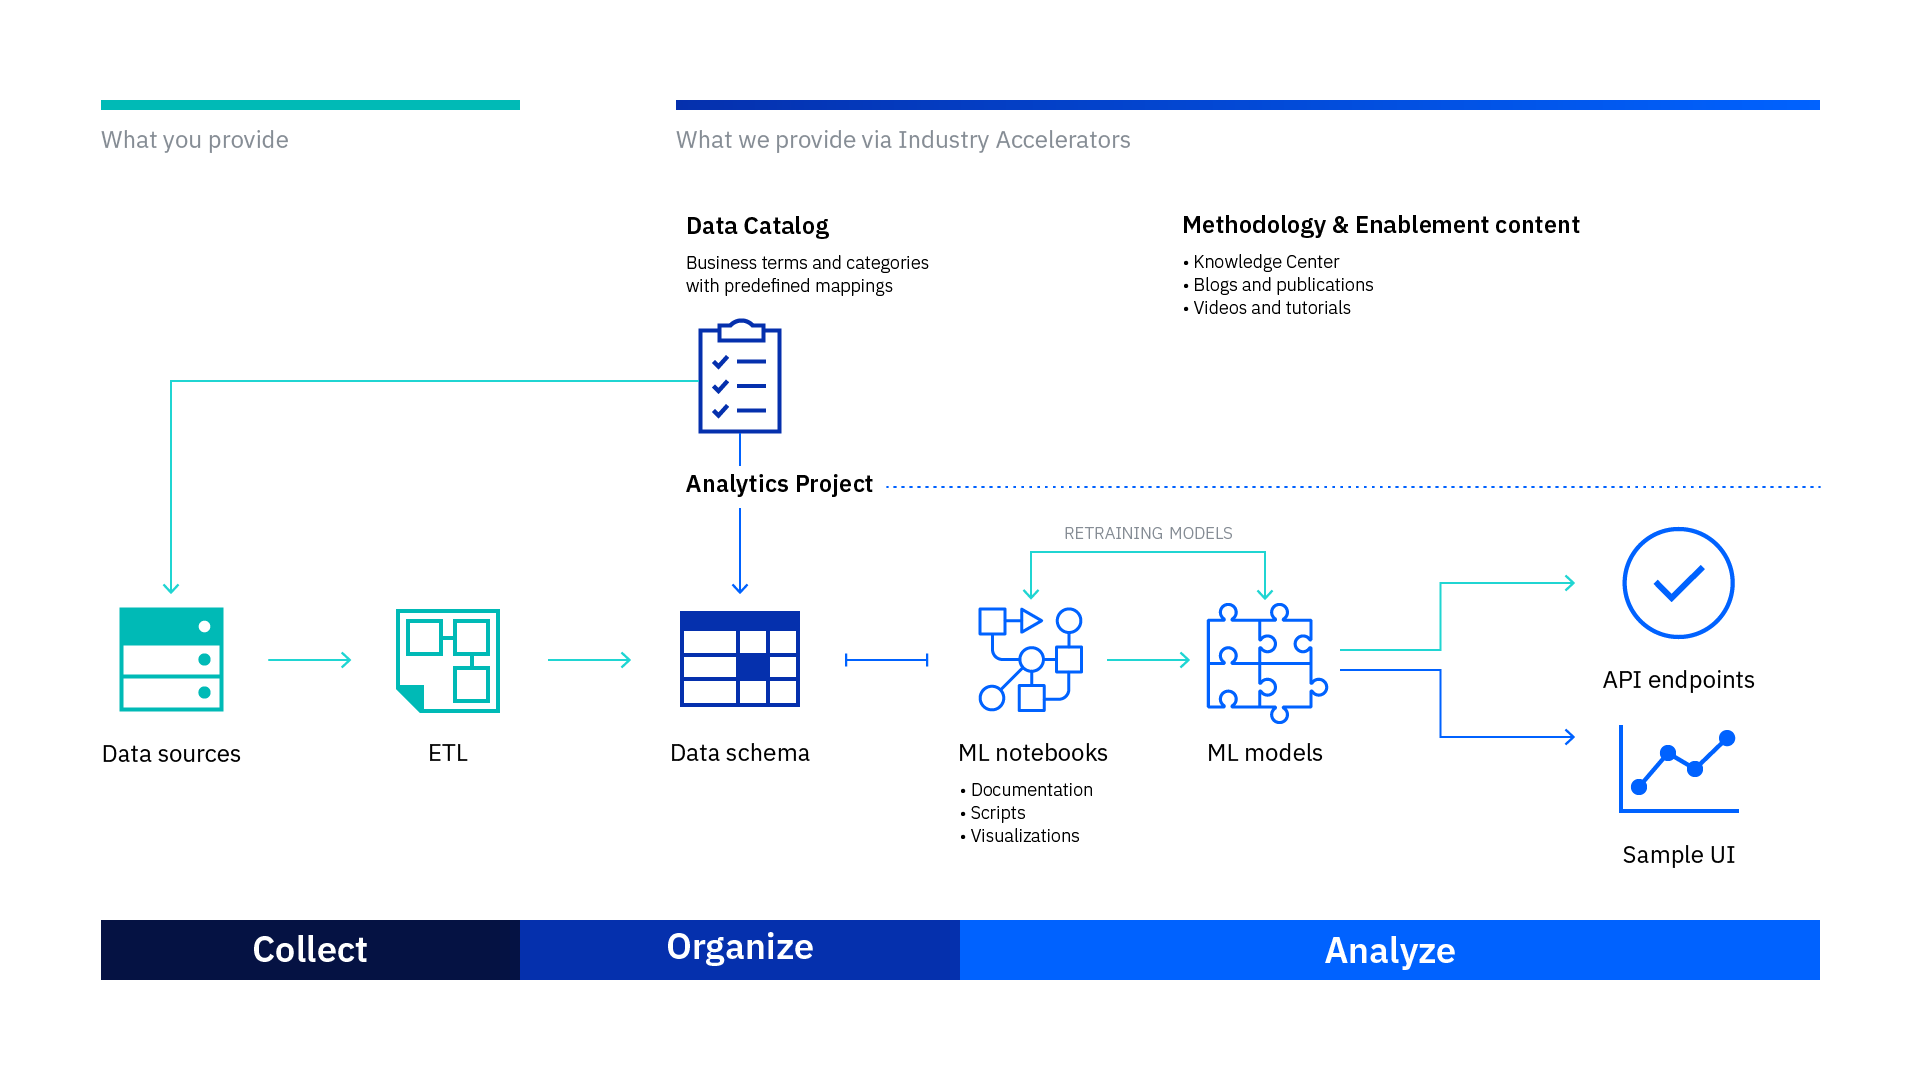

In [1]:
from IPython.display import display, Image
display(Image(filename='/project_data/data_asset/acceleratorWorkflow.png'))

## Inventory of Artifacts provided

### Knowledge Catalog

Described in the Knowledge Center  https://www.ibm.com/support/producthub/icpdata/docs/content/SSQNUZ_current/cpd/svc/industry-accel-svc.html

### Sample Datasets

The sample input datasets are : 

* **'customer.csv'** : Customer Data, Demographic data, Temporal data. 
* **'account.csv'** : Account type and Account Information Data, Investment Information, Temporal data. 
* **'customer_summary.csv'** : Detailed Customer Transaction Data, Business Metrics, Investment and Income Stats.

The idea is to produce a merged dataset which is used as input for model training and scoring purposes. The above three datasets need to be merged on the basis of the following data fields: 
* **customer.customer_id, customer.effective_date, customer_summary.customer_id, customer_summary.end_date, account.primary_customer_id, account.open_date and account.close_date.**

The merged dataset is the **'customer_history.csv'** which can be found in the **data_asset** folder alongsides the rest of the csv files. This CSV is the the starting point for the data preparation. We filter, transform and aggregate the data resulting in a dataset with one record per customer, which can be used for modelling purposes. <br>

Additionally, the project also includes another dataset which is the **account_summary.csv** which is related to the **account.csv**. This dataset also comprises of account related data and investment data. This information is only used to depict financial statistics of the customers in the analytics dashboard. 

### Notebooks

Follow the sequence shown below

* **1-model_training**: Load data; Prepare and clean data for model training; Analyze correlations; Build ML models, Analyze and visualize the data; Select best performing ML model and save to Cloud Pak for Data; Create a Watson Machine Learning based deployment space; Store the model in the space and deploy the model.

* **2-model_scoring_and_app_deployment** : Get the deployment space and deployments; Deploy the data assets; Create and deploy a pipeline function for model scoring; Predict Customer attrition.

* **Optional - 0-Map Business Terms to data headers** : This notebook publishes the project csv files into a specified catalog. It reads mappings from csv files and applies business terms to the published dataset headers. 


### Scripts

The following script is called from the **1-model_training notebook** :

* **attrition_prep.py :** used in **1-model-training** notebook. The script performs the data preparation and generates the dataset that is used for modelling. It filters the dataset to include only columns that are relevant, completes data cleaning and produces the data for modelling. The target variable is created based on whether a customer attrited or not.

### Functions

The following function is created in **2-model_scoring_and_app_deployment notebook** : 

* **attrition_scoring_pipeline_function** : Using the deployed function allows us to prepare the data and pass it to the model for scoring. The raw data to be scored is prepared using **attrition_prep.py** and the function calls the model deployment endpoints to score and return predictions for customer attrition. The function is also accessed to make predictions from the Dashboard. 

### R Shiny Dashboard

The Shiny dashboard app is deployed in 2-model_scoring_and_app_deployment and includes instructions on how to access the dashboard app.

The dashboard has the following tabs:

* **Dashboard View** : Shows top action clients,  monthly customer attrition, and customer attrition risk level. 
* **Client View** : Targets individual client information, depicts the top business metrics, account details, provides option to run the model scoring webservice, predicts Customer Attrition and Visualizes the influential factors and data fields.

Alternatively, user can run the dashboard from R-Studio console using below steps

* Download the **customer-attrition-prediction-analytics-dashboard** zip file from project `data_assets` .
* From the project homepage Launch the IDE for R-Studio.
* Upload the **customer-attrition-prediction-analytics-dashboard** zip file in to rstudio.
* Navigate to **app.R** file and click on Run App option to launch the dashboard.


### Jobs
**1-Model_Training_Notebook_Job** : Runs the 1-model_training notebook end to end.<br>
**2-Model_Scoring_Notebook_Job** : Runs the 2-model_scoring_and_app_deployment notebook end to end.

### Sequence of steps to run


* Open **1-model_training** notebook & execute step-by-step.
* Open **2-model_scoring_and_app_deployment** notebook & execute step-by-step.
* Open the dashboard from the url generated in **2-model_scoring_and_app_deployment** notebook. <br>
    Alternatively, open the dashboard using R-Studio IDE. <br>
    
 **OR** <br>
 
- Kick off the job **1-Model_Training_Notebook_Job** from Jobs tab.
- On successful completion of **1-Model_Training_Notebook_Job**, Kick off the job **2-Model_Scoring_Notebook_Job** from Jobs tab.
- When **2-Model_Scoring_Notebook_Job** is successful, Open the dashboard from the url generated by navigating to **Deployments -> Spaces -> Customer Attrition Space -> Deployments -> Customer-Attrition-Prediction-Shiny-App**.

**This project contains Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2019, 2020. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.<br>**